# Youtube data collection and analysis

### To collect data from YouTube, we need to be clear about what data we need. Let's collect data about the trending videos on YouTube to analyze and find what makes a video trend on YouTube

## Overview of project
* Extract data from google cloud api
* do some cleaning and formating
* done some analysis by using groupby function and data visualzation tools

In [1]:
# import libary
import pandas as pd
from googleapiclient.discovery import build

# replace with your own API key
API_KEY = 'ADD YOUR API KEY'

def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US',
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()


Trending videos saved to trending_videos.csv


In [2]:
yt_data = pd.read_csv('trending_videos.csv')
yt_data.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,ZFgjmsYqJyw,skibidi toilet 77 (part 3),"cameramen face real trouble, then someone arri...",2024-09-22T10:30:07Z,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,"['sfm animation', 'skibidi toilet vs cameramen...",PT4M51S,hd,True,9102859,635770,0,0,81412
1,TLKBWE35FRQ,Baylor Bears vs. Colorado Buffaloes | Full Gam...,✔️Subscribe to ESPN+ http://espnplus.com/youtu...,2024-09-22T03:56:27Z,UCzRWWsFjqHk1an4OnVPsl9g,ESPN College Football,17,"['college football espn', 'espn college footba...",PT6M44S,hd,False,1221137,15612,0,0,2762
2,wVyu7NB7W6Y,Exposing The Flaw In Our Phone System,Can you trust your phone? Head to https://bril...,2024-09-21T23:10:47Z,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,28,"['veritasium', 'spyware', 'pegasus', 'malware'...",PT31M55S,hd,True,2923708,168934,0,0,8469
3,idFpAv9nh9E,Our Longest Trick Shots EVER,Welcome to our BIGGEST TRICK SHOT VIDEO EVER!!...,2024-09-21T13:59:59Z,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,"['dude perfect', 'dude perfect stereotypes', '...",PT24M25S,hd,False,2277380,88689,0,0,2905
4,8H6eLTcIWEU,My Thoughts on Tattoos,I have two tattoos so they're my tatTWOS\nGet ...,2024-09-21T15:01:20Z,UCo8bcnLyZH8tBIH9V1mLgqQ,TheOdd1sOut,23,[],PT12M26S,hd,False,2185116,166986,0,0,11127


In [3]:
yt_data.shape

(200, 16)

In [4]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     199 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [5]:
yt_data.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,200.000000,2.000000e+02,2.000000e+02,200.0,200.0,200.000000
mean,18.695000,1.983036e+06,6.745287e+04,0.0,0.0,4560.965000
std,6.732653,7.562830e+06,2.464995e+05,0.0,0.0,9885.227464
min,1.000000,2.855000e+03,0.000000e+00,0.0,0.0,0.000000
25%,17.000000,3.566355e+05,9.432750e+03,0.0,0.0,824.500000
50%,20.000000,6.166700e+05,2.505700e+04,0.0,0.0,1754.000000
75%,24.000000,1.549858e+06,5.591825e+04,0.0,0.0,4228.250000
max,28.000000,1.031968e+08,3.338443e+06,0.0,0.0,83840.000000


In [6]:
yt_data['description'].fillna('no description',inplace=True)


In [7]:
yt_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     200 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [8]:
yt_data['published_at'] = pd.to_datetime(yt_data['published_at'])

In [9]:
yt_data['tags'] = yt_data['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [10]:
yt_data

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,ZFgjmsYqJyw,skibidi toilet 77 (part 3),"cameramen face real trouble, then someone arri...",2024-09-22 10:30:07+00:00,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,"[sfm animation, skibidi toilet vs cameramen, s...",PT4M51S,hd,True,9102859,635770,0,0,81412
1,TLKBWE35FRQ,Baylor Bears vs. Colorado Buffaloes | Full Gam...,✔️Subscribe to ESPN+ http://espnplus.com/youtu...,2024-09-22 03:56:27+00:00,UCzRWWsFjqHk1an4OnVPsl9g,ESPN College Football,17,"[college football espn, espn college football,...",PT6M44S,hd,False,1221137,15612,0,0,2762
2,wVyu7NB7W6Y,Exposing The Flaw In Our Phone System,Can you trust your phone? Head to https://bril...,2024-09-21 23:10:47+00:00,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,28,"[veritasium, spyware, pegasus, malware, pegasu...",PT31M55S,hd,True,2923708,168934,0,0,8469
3,idFpAv9nh9E,Our Longest Trick Shots EVER,Welcome to our BIGGEST TRICK SHOT VIDEO EVER!!...,2024-09-21 13:59:59+00:00,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,"[dude perfect, dude perfect stereotypes, dude ...",PT24M25S,hd,False,2277380,88689,0,0,2905
4,8H6eLTcIWEU,My Thoughts on Tattoos,I have two tattoos so they're my tatTWOS\nGet ...,2024-09-21 15:01:20+00:00,UCo8bcnLyZH8tBIH9V1mLgqQ,TheOdd1sOut,23,[],PT12M26S,hd,False,2185116,166986,0,0,11127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,hh3p_MsIW_A,Am I Racist? - Movie Review,Not many mainstream reviews of this one.....so...,2024-09-15 15:12:39+00:00,UC7v3-2K1N84V67IF-WTRG-Q,Jeremy Jahns,24,"[matt walsh, daily wire, dei, social expiramen...",PT4M27S,hd,False,879114,99570,0,0,21707
196,tmSzoy8cl8Y,"Film Theory: You Can Skip the Minecraft Movie,...",*Want the EXCLUSIVE Film Theory red jacket?*\n...,2024-09-15 17:05:00+00:00,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,"[minecraft, minecraft movie, a minecraft movie...",PT17M1S,hd,True,1731282,88617,0,0,6738
197,SbvAaDN1bpE,Why Scientists Are Puzzled By This Virus,Build a life of learning with Imprint. Go to h...,2024-09-17 14:00:08+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,[],PT10M44S,hd,True,2654996,127868,0,0,3791
198,9XhLOTO2scs,Next Life (Sped Up),Provided to YouTube by Perfect Distro\n\nNext ...,2024-09-16 14:46:53+00:00,UCVaU7GGjuvGUBaWyzhkWPIA,Allison Kane - Topic,10,"[Allison Kane, Next Life (Sped Up)]",PT2M10S,hd,False,2855,17420,0,0,50


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-12-c7af1646fdf3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt_data['comment_count'],color = 'green')


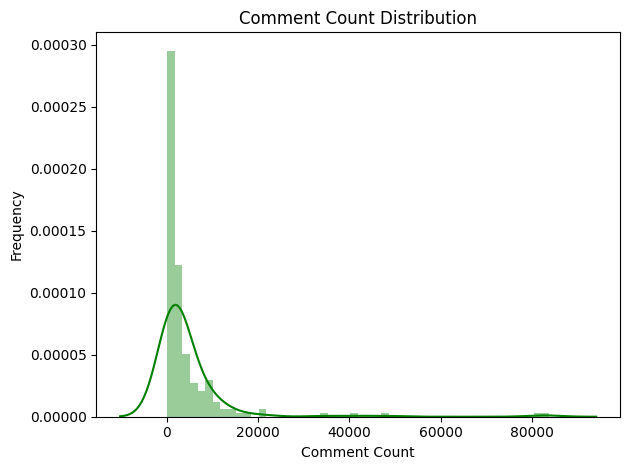

In [12]:
# Distribution of comment counts
sns.distplot(yt_data['comment_count'],color = 'green')
plt.title('Comment Count Distribution')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-13-1ccb6a286f25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt_data['like_count'],color = 'red')


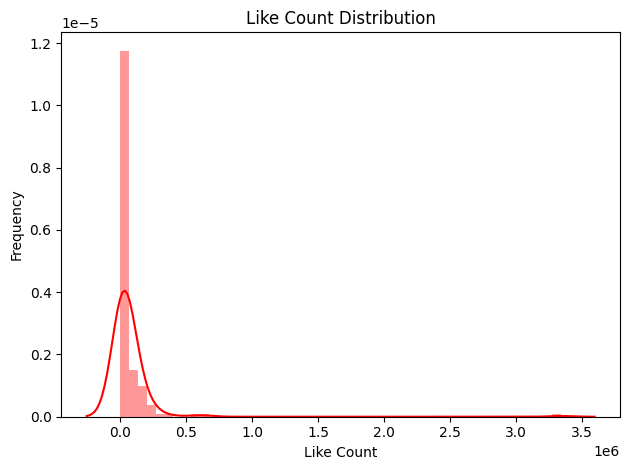

In [13]:
# Distribution of likes counts
sns.distplot(yt_data['like_count'],color = 'red')
plt.title('Like Count Distribution')
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-14-73c18192a8bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt_data['view_count'],color = 'skyblue')


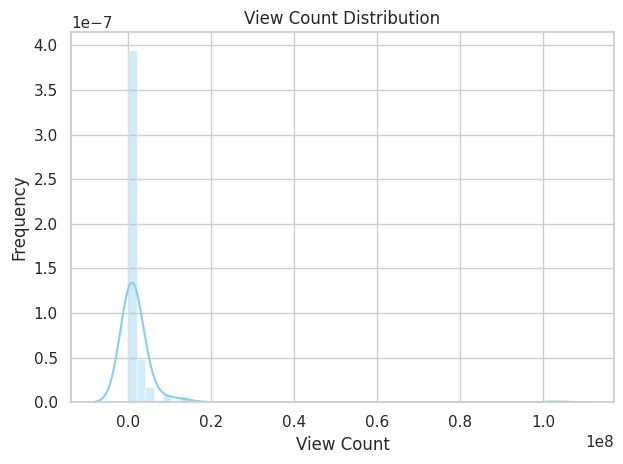

In [14]:
# Distribution of view counts
sns.set(style="whitegrid")
sns.distplot(yt_data['view_count'],color = 'skyblue')
plt.title('View Count Distribution')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
num_data = yt_data[['comment_count','like_count','view_count']].corr()

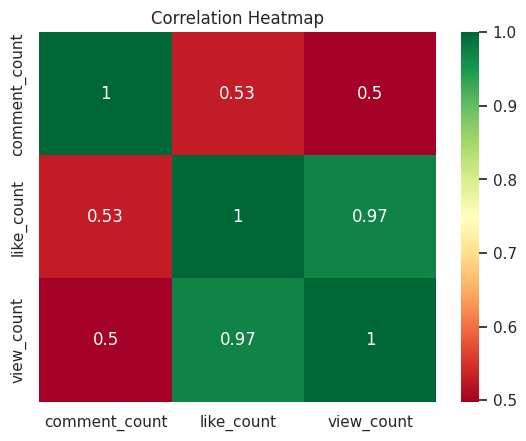

In [16]:
sns.heatmap(num_data,annot=True,cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
from googleapiclient.discovery import build

In [18]:
# i miss the category column lets extract it
API_kEY = 'ADD YOUR API KEY '
youtube = build('youtube','v3',developerKey=API_kEY)
def categorical_val():
  request = youtube.videoCategories().list(
      part='snippet',
      regionCode='US'
  )
  response = request.execute()
  categories = {}
  for item in response['items']:
    categories[item['id']] = item['snippet']['title']
  return categories
values = categorical_val()
print(values)


{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [19]:
yt_data['category_name'] = yt_data['category_id'].astype(str).map(values)


In [20]:
yt_data

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name
0,ZFgjmsYqJyw,skibidi toilet 77 (part 3),"cameramen face real trouble, then someone arri...",2024-09-22 10:30:07+00:00,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,"[sfm animation, skibidi toilet vs cameramen, s...",PT4M51S,hd,True,9102859,635770,0,0,81412,Entertainment
1,TLKBWE35FRQ,Baylor Bears vs. Colorado Buffaloes | Full Gam...,✔️Subscribe to ESPN+ http://espnplus.com/youtu...,2024-09-22 03:56:27+00:00,UCzRWWsFjqHk1an4OnVPsl9g,ESPN College Football,17,"[college football espn, espn college football,...",PT6M44S,hd,False,1221137,15612,0,0,2762,Sports
2,wVyu7NB7W6Y,Exposing The Flaw In Our Phone System,Can you trust your phone? Head to https://bril...,2024-09-21 23:10:47+00:00,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,28,"[veritasium, spyware, pegasus, malware, pegasu...",PT31M55S,hd,True,2923708,168934,0,0,8469,Science & Technology
3,idFpAv9nh9E,Our Longest Trick Shots EVER,Welcome to our BIGGEST TRICK SHOT VIDEO EVER!!...,2024-09-21 13:59:59+00:00,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,"[dude perfect, dude perfect stereotypes, dude ...",PT24M25S,hd,False,2277380,88689,0,0,2905,Sports
4,8H6eLTcIWEU,My Thoughts on Tattoos,I have two tattoos so they're my tatTWOS\nGet ...,2024-09-21 15:01:20+00:00,UCo8bcnLyZH8tBIH9V1mLgqQ,TheOdd1sOut,23,[],PT12M26S,hd,False,2185116,166986,0,0,11127,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,hh3p_MsIW_A,Am I Racist? - Movie Review,Not many mainstream reviews of this one.....so...,2024-09-15 15:12:39+00:00,UC7v3-2K1N84V67IF-WTRG-Q,Jeremy Jahns,24,"[matt walsh, daily wire, dei, social expiramen...",PT4M27S,hd,False,879114,99570,0,0,21707,Entertainment
196,tmSzoy8cl8Y,"Film Theory: You Can Skip the Minecraft Movie,...",*Want the EXCLUSIVE Film Theory red jacket?*\n...,2024-09-15 17:05:00+00:00,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,"[minecraft, minecraft movie, a minecraft movie...",PT17M1S,hd,True,1731282,88617,0,0,6738,Film & Animation
197,SbvAaDN1bpE,Why Scientists Are Puzzled By This Virus,Build a life of learning with Imprint. Go to h...,2024-09-17 14:00:08+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,[],PT10M44S,hd,True,2654996,127868,0,0,3791,Education
198,9XhLOTO2scs,Next Life (Sped Up),Provided to YouTube by Perfect Distro\n\nNext ...,2024-09-16 14:46:53+00:00,UCVaU7GGjuvGUBaWyzhkWPIA,Allison Kane - Topic,10,"[Allison Kane, Next Life (Sped Up)]",PT2M10S,hd,False,2855,17420,0,0,50,Music


<ipython-input-21-aa58392641df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(order = yt_data['category_name'].value_counts().index , y = yt_data['category_name'] , palette = 'viridis')


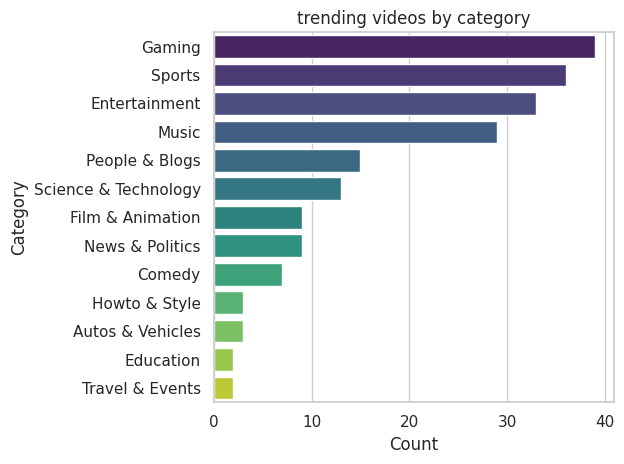

In [21]:
# trending videos of the category
sns.countplot(order = yt_data['category_name'].value_counts().index , y = yt_data['category_name'] , palette = 'viridis')
plt.title('trending videos by category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [22]:
categorical_enagemnet = yt_data.groupby('category_name')[['view_count','like_count','comment_count']].mean().sort_values(by='view_count', ascending=False)

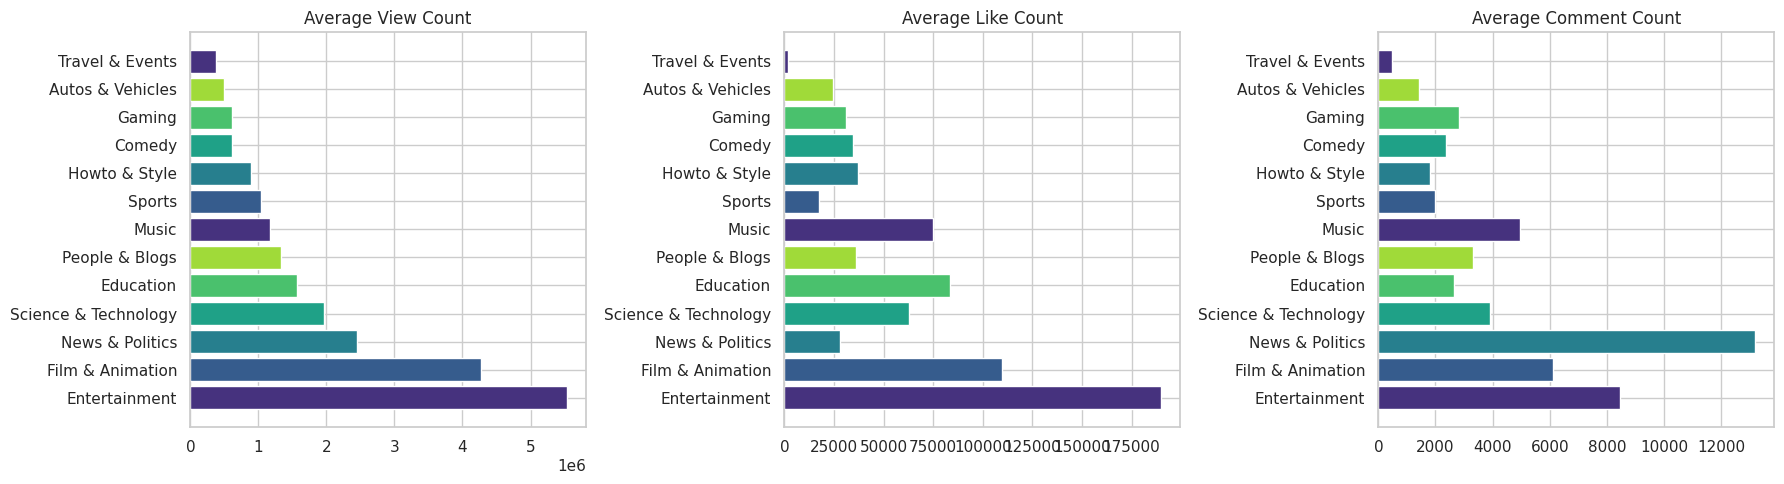

In [23]:
# Distrbution of Categorical enagement
fig , axes = plt.subplots(1,3,figsize=(18,5))
palette = sns.color_palette('viridis')
# average view counts
axes[0].barh(y=categorical_enagemnet.index,width=categorical_enagemnet['view_count'], color = palette)
axes[0].set_title('Average View Count')
# average counts of likes
axes[1].barh(y=categorical_enagemnet.index,width=categorical_enagemnet['like_count'], color = palette)
axes[1].set_title('Average Like Count')
# average  counts of comments
axes[2].barh(y=categorical_enagemnet.index,width=categorical_enagemnet['comment_count'],color = palette)
axes[2].set_title('Average Comment Count')
plt.tight_layout()
plt.show()


In [24]:
!pip install isodate
import isodate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 995.1 kB/s eta 0:00:00


In [25]:
yt_data['duration_seconds'] = yt_data['duration'].apply(lambda x: isodate.parse_duration(x))
yt_data['duration_range'] = pd.cut(yt_data['duration_seconds'], bins=[pd.Timedelta(seconds=0), pd.Timedelta(seconds=300), pd.Timedelta(seconds=600), pd.Timedelta(seconds=1200), pd.Timedelta(seconds=3600), pd.Timedelta(seconds=7200)] , labels = ['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

<ipython-input-26-eb7cdaf57860>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_enagement = yt_data.groupby('duration_range')[['view_count','like_count','comment_count']].mean()


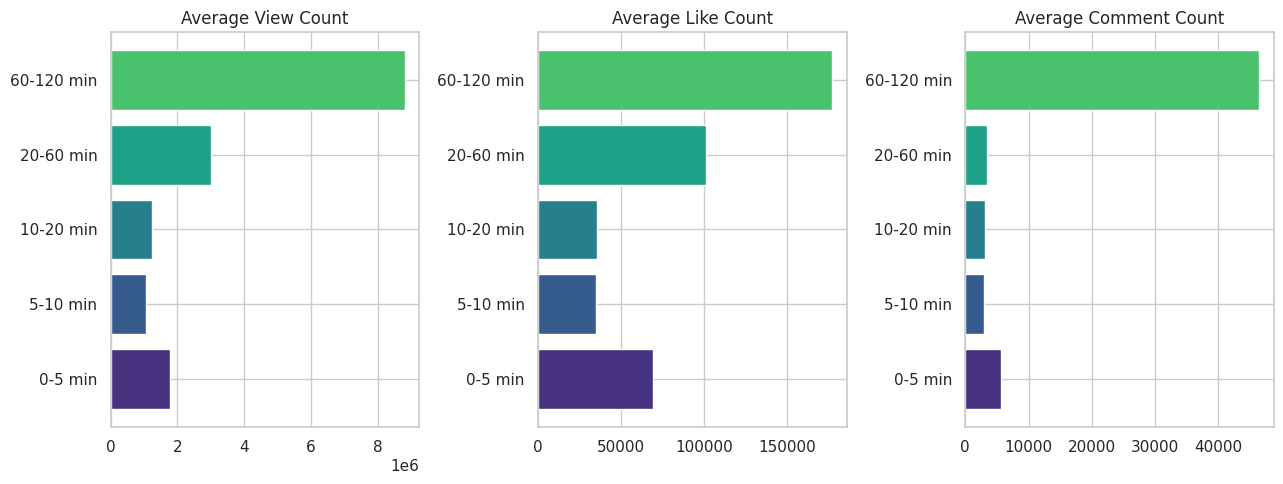

In [26]:
# bar chart for engagement metrics by duration range
length_enagement = yt_data.groupby('duration_range')[['view_count','like_count','comment_count']].mean()
fig , axes = plt.subplots(1,3,figsize=(13,5))
axes[0].barh(y=length_enagement.index,width=length_enagement['view_count'], color = palette)
axes[0].set_title('Average View Count')
# bar chart for likes enagagement
axes[1].barh(y=length_enagement.index,width=length_enagement['like_count'], color = palette)
axes[1].set_title('Average Like Count')
# bar chat for comment engagement
axes[2].barh(y=length_enagement.index,width=length_enagement['comment_count'], color = palette)
axes[2].set_title('Average Comment Count')
plt.tight_layout()
plt.show()


<ipython-input-27-64d550f9fc43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=yt_data, palette='coolwarm')


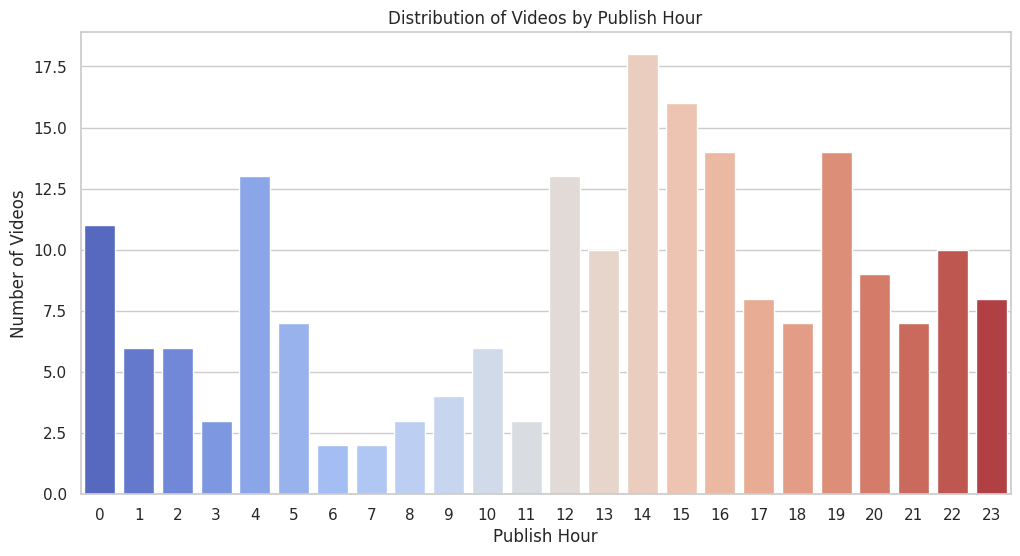

In [27]:
# extract hour of publication
yt_data['publish_hour'] = yt_data['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=yt_data, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()


# summary
* Encourage viewers to like and comment on videos to boost engagement metrics.
* Aim to create shorter videos (under 5 minutes) for higher engagement, especially for categories like Music and Entertainment.
* Schedule video uploads around peak times (2 PM – 8 PM) to maximize initial views and engagement.